# Virat Kohli - ODI Analysis

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor , XGBRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

### Importing Clean Data

In [2]:
# df = pd.read_excel('ViratKohli-ODI.xlsx')
df = pd.read_excel('ODI-Clean.xlsx')

In [3]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW


### Data information and Description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Match             308 non-null    object        
 1   Innings           296 non-null    float64       
 2   Date              308 non-null    datetime64[ns]
 3   M/Inns            308 non-null    object        
 4   Posn              308 non-null    int64         
 5   Versus            308 non-null    object        
 6   Ground            308 non-null    object        
 7   How Dismissed     308 non-null    object        
 8   Runs              308 non-null    int64         
 9   B/F               308 non-null    int64         
 10  S/R               308 non-null    float64       
 11  Progressive-Runs  308 non-null    int64         
 12  Progressive-B/F   308 non-null    int64         
 13  Progressive-Avg   308 non-null    float64       
 14  Progressive-S/R   308 non-

In [5]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Innings,296.0,148.5,1.0,74.75,148.5,222.25,296.0,85.592056
Date,308,2016-03-16 07:33:30.389610496,2008-08-18 00:00:00,2012-02-13 12:00:00,2015-03-08 00:00:00,2019-06-23 06:00:00,2025-12-06 00:00:00,NaN
Posn,308.0,3.061688,0.0,3.0,3.0,3.0,7.0,0.909286
Runs,308.0,47.262987,0.0,8.75,34.0,80.25,183.0,43.310924
B/F,308.0,50.464286,0.0,13.0,43.0,83.0,159.0,39.894919
S/R,308.0,77.269286,0.0,59.905,80.95,100.0,209.09,39.081306
Progressive-Runs,308.0,6910.480519,12.0,2997.25,6473.0,11105.0,14557.0,4375.897862
Progressive-B/F,308.0,7578.116883,22.0,3581.75,7195.0,11923.5,15543.0,4596.356583
Progressive-Avg,308.0,52.078214,12.0,49.165,52.17,57.8175,60.31,6.768001
Progressive-S/R,308.0,87.948377,54.55,83.9075,89.91,92.93,93.85,6.428469


### Null Values

In [6]:
df.isnull().sum()

Match                0
Innings             12
Date                 0
M/Inns               0
Posn                 0
Versus               0
Ground               0
How Dismissed        0
Runs                 0
B/F                  0
S/R                  0
Progressive-Runs     0
Progressive-B/F      0
Progressive-Avg      0
Progressive-S/R      0
Captain              0
Dismissal Type       0
dtype: int64

### Nulls in "Innings" indicate that we have a result for the match but Virat Kohli did not bat. 

In [7]:
df.shape

(308, 17)

### Mapping Grounds to State and Country
Used Chatgpt to get the geographical information of the grounds. 

In [8]:
grounds = pd.read_csv('Grounds.csv')

In [9]:
df = pd.merge(df,grounds,on='Ground' , how='left')

In [10]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726


In [11]:
df.isnull().sum()

Match                0
Innings             12
Date                 0
M/Inns               0
Posn                 0
Versus               0
Ground               0
How Dismissed        0
Runs                 0
B/F                  0
S/R                  0
Progressive-Runs     0
Progressive-B/F      0
Progressive-Avg      0
Progressive-S/R      0
Captain              0
Dismissal Type       0
City                 0
State/Province      13
Country              0
ICC Region           0
Latitude             0
longitude            0
dtype: int64

In [12]:
# df[df['State/Province'].isna()]

In [13]:
# grounds.head()

### Analysis

### Heat Map

<AxesSubplot:>

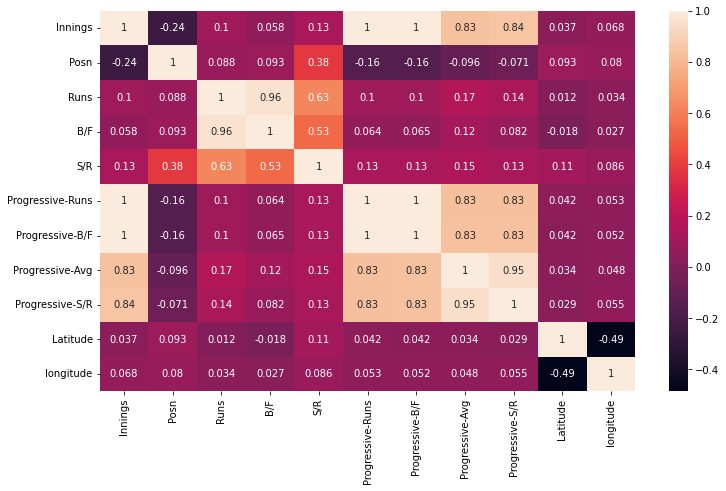

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Scores against each oppositions

In [15]:
df.groupby('Versus')['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,Versus,mean,count
0,Bangladesh,54.823529,17
1,South Africa,53.117647,34
2,West Indies,52.581395,43
3,New Zealand,50.212121,33
4,Australia,47.641509,53
5,Sri Lanka,47.357143,56
6,Pakistan,45.764706,17
7,Afghanistan,40.666667,3
8,Ireland,39.000000,2
9,England,36.763158,38


### Average Scores M/Innings

In [16]:
df.groupby('M/Inns')['Runs'].agg(['mean','count']).sort_values(by = 'count',ascending=False).reset_index()

,M/Inns,mean,count
0,2nd,48.538462,169
1,1st,47.066667,135
2,N/A - No Result,0.000000,4


### Mean S/R - M/Innings

In [17]:
df.groupby('M/Inns')['S/R'].mean()

M/Inns
1st                76.981333
2nd                79.328166
N/A - No Result     0.000000
Name: S/R, dtype: float64

### Mean scores at each batting positions

In [18]:
df.groupby('Posn')['Runs'].agg(['mean','count']).sort_values(by = 'count',ascending=False).reset_index()

,Posn,mean,count
0,3,51.601660,241
1,4,45.307692,39
2,0,0.000000,12
3,1,28.750000,4
4,5,31.750000,4
5,7,9.500000,4
6,2,17.000000,3
7,6,23.000000,1


### How was he dismissed mostly? 

Dismissal Type
Caught         176
Not Out         47
Bowled          34
LBW             21
Run Out         12
Did Not Bat     12
Stumped          5
Hit Wicket       1
Name: count, dtype: int64


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


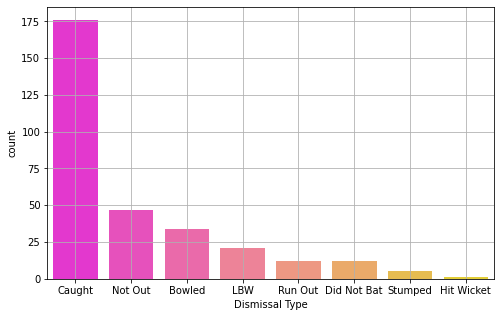

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(df['Dismissal Type'],order = df['Dismissal Type'].value_counts().index,palette='spring')
plt.grid()
print(df['Dismissal Type'].value_counts())
plt.show()

In [20]:
### Most of the Dismissal are Caught (At slips, iykyk lol.) 

### Does captaincy bring the best out of Virat? 

In [21]:
df.groupby('Captain')['Runs'].agg(['mean','count']).sort_values(by = 'count',ascending=False).reset_index()

,Captain,mean,count
0,No,42.760563,213
1,Yes,57.357895,95


In [22]:
### Significantly yes! 

### Mean Scores by Country

In [23]:
df.groupby('Country')['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,Country,mean,count
0,Trinidad and Tobago,63.444444,9
1,Bangladesh,57.736842,19
2,Jamaica,54.500000,4
3,India,52.181102,127
4,South Africa,49.650000,20
5,Wales,49.000000,4
6,New Zealand,45.846154,13
7,Australia,43.781250,32
8,UAE,43.600000,5
9,Zimbabwe,40.555556,9


### Mean Scores in SENA Countries

In [24]:
sena = []
for i in df['Country']:
    if i in ('South Africa', 'England', 'Wales','New Zealand', 'Australia'):
        sena.append(1)
    else:
        sena.append(0)
df['SENA'] = sena

In [25]:
df.groupby(['SENA'])['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,SENA,mean,count
0,0,48.657143,210
1,1,44.275510,98


In [26]:
### Has slightly better mean scores in Non SENA countries 

### How well has he scored in SENA countries as a captain? 

In [27]:
df.groupby(['Captain','SENA'])['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,Captain,SENA,mean,count
0,Yes,0,57.500000,60
1,Yes,1,57.114286,35
2,No,0,45.120000,150
3,No,1,37.142857,63


In [28]:
### Has outstanding averages as a captian Irrespective of SENA nation or not.
### As a player, he has better mean scores in Non Sena nations but his average has dropped in SENA nations as a player. 

### Cleaning Match 

In [29]:
match = []
for i in df['Match']:
    match.append(i.split('(')[0])
df['Match'] = match

In [30]:
df['Match'] = df['Match'].astype('int64')

In [31]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude,SENA
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0


### Saving File for ML

In [32]:
df.to_csv('Data-Regression.csv',index=False)